In [1]:
"""Template for jupyter notebooks created within this directory. Adds the parent directory to path and sets autoreload."""

'Template for jupyter notebooks created within this directory. Adds the parent directory to path and sets autoreload.'

In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import os
import sys

# Get the current working directory
cwd = os.getcwd()

# Get the parent directory
parent_dir = os.path.dirname(cwd)

# Get the grandparent directory (two levels above)
root_dir = os.path.dirname(parent_dir)

# Add the root directory to sys.path
if root_dir not in sys.path:
    sys.path.append(root_dir)

print(f"Root directory: {root_dir} is added to sys.path")


Root directory: /Users/aag/Documents/proteinfolding is added to sys.path


In [3]:
from proteinfolding import * ## should run without errors
from proteinfolding.paths import EXACT_DATA_ENERGY_BITSTRING_FILE
##TODO: proper testing ##

In [4]:
#### SINGLE SIMULATION ####

from proteinfolding.data_processing import *
from proteinfolding.paths import XY_QAOA_DATA_DIR, XY_QAOA_PLOTS_HYPERPARAMETER_ANALYSIS

SIMULATION_ID = "A127566"
PROCESSED_DATA_DIR = os.path.join(XY_QAOA_DATA_DIR, SIMULATION_ID)
PLOT_DIR = os.path.join(XY_QAOA_PLOTS_HYPERPARAMETER_ANALYSIS, SIMULATION_ID)

/Users/aag/Documents/proteinfolding/notebooks/data_processing
┌──────────────────────────────────────────────────────────────────────────────┐
│                                 PyRosetta-4                                  │
│              Created in JHU by Sergey Lyskov and PyRosetta Team              │
│              (C) Copyright Rosetta Commons Member Institutions               │
│                                                                              │
│ NOTE: USE OF PyRosetta FOR COMMERCIAL PURPOSES REQUIRE PURCHASE OF A LICENSE │
│         See LICENSE.PyRosetta.md or email license@uw.edu for details         │
└──────────────────────────────────────────────────────────────────────────────┘
PyRosetta-4 2025 [Rosetta PyRosetta4.Release.python310.m1 2025.06+release.029c6a159b896477003a14f78f472d4cd2cead46 2025-02-04T15:14:13] retrieved from: http://www.pyrosetta.org
core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: PyRosetta4.Release.p

In [5]:
import pandas as pd


# df_exact = pd.read_csv("/Users/aag/Documents/proteinfolding/data/processed/exact/exact_ground_state_and_energy.csv")

# # exact_data = pd.read_csv(EXACT_DATA_ENERGY_BITSTRING_FILE_ALL, compression='gzip')
# df_filtered = exact_data[(exact_data['num_res'] == num_res) & (exact_data['num_rot'] == num_rot)]
# if df_filtered.empty:
#     print(f"No exact energy found for num_rot={num_rot}, num_res={num_res}. Skipping.")
#     continue

# # df_filtered = df_filtered.sort_values(by='energies').head(1)
# # min_energy, min_energy_bitstring = find_min_energy_and_bitstring_from_exact_energy_dataframe(exact_data, num_res, num_rot)

# df_filtered = df_filtered.sort_values(by='gs_energy').head(1)
# min_energy = df_filtered['gs_energy']
# print(min_energy)

df_exact = pd.read_csv(EXACT_DATA_ENERGY_BITSTRING_FILE, compression="gzip")
df = pd.read_csv(os.path.join(PROCESSED_DATA_DIR, f"{SIMULATION_ID}.csv.gz"), compression="gzip")   

In [6]:
# if df contains pos, create a new df without it
pos = 0

# create a new df with pos=pos
df_pos = df[df['pos'] == pos]

# drop pos column
df_pos = df_pos.drop(columns=['pos'])

In [7]:
print(df_exact.head)

<bound method NDFrame.head of      num_res  num_rot                                           energies  \
0          2        2  [(0.22744239866733562+0j), (0.0660957843065260...   
1          2        3  [(-1.8422357141971588+0j), (-2.003582328557968...   
2          3        2  [(-1.5153165645897388+0j), (-0.441403400152921...   
3          3        3  [(-4.412406247109175+0j), (-3.3384930826723576...   
4          4        2  [(2.9962810706347227+0j), (3.221675081178546+0...   
..       ...      ...                                                ...   
96         4       13  [(-22.59965192526579+0j), (-22.374257914721966...   
97         4       14  [(-22.646138064563274+0j), (-22.42074405401945...   
98         4       15  [(-23.967076186090708+0j), (-23.74168217554688...   
99         5       11  [(-137.233120709192+0j), (-137.01510742260143+...   
100        5       12  [(-158.52617246564478+0j), (-158.3067291444167...   

                                            bitstrings  


In [8]:
print(df)

    num_res  num_rot  alpha  shots  p  pos  transverse_field  \
0         4        5    0.2     45  4    0                 1   
1         4        5    0.2     30  4    0                 1   
2         5        5    0.2     45  4    0                 1   
3         4        4    0.2     35  4    0                 1   
4         5        3    0.2     40  4    0                 1   
..      ...      ...    ...    ... ..  ...               ...   
58        4        2    0.2     40  4    0                 1   
59        4        2    0.2     15  4    0                 1   
60        4        2    0.2     50  4    0                 1   
61        5        2    0.2     15  4    0                 1   
62        4        2    0.2     45  4    0                 1   

                                           bitstrings     energy  \
0   ['10000001000000100010', '10000010000000100010... -35.788970   
1   ['10000001000000100010', '10000010000000100010... -35.788970   
2   ['010000010000001001000

In [9]:
df_exact = df_exact.drop_duplicates(subset=['num_res', 'num_rot'])

In [10]:
duplicates = df_exact[df_exact.duplicated(subset=['num_res', 'num_rot'], keep=False)]
print(duplicates)

Empty DataFrame
Columns: [num_res, num_rot, energies, bitstrings]
Index: []


In [11]:
print(df_exact[(df_exact['num_res'] == 9) & (df_exact['num_rot'] == 3)])

    num_res  num_rot                                           energies  \
15        9        3  [(-22.82150822877884+0j), (-22.799635231494904...   

                                           bitstrings  
15  ['100100100100100100100100100', '1001001001001...  


In [12]:
from proteinfolding.data_processing import generate_minimum_shots_to_ground_state_data

df_min_shots = generate_minimum_shots_to_ground_state_data(df_pos, df_exact)

In [13]:
# save the data

from proteinfolding.paths import MIN_SHOTS_TO_FIND_GS_FILE

if not os.path.exists(PROCESSED_DATA_DIR):
    os.makedirs(PROCESSED_DATA_DIR)

df_min_shots.to_csv(os.path.join(PROCESSED_DATA_DIR, MIN_SHOTS_TO_FIND_GS_FILE), index=False)

In [14]:
df_min_shots.keys()

Index(['num_res', 'num_rot', 'num_qubits', 'alpha', 'p', 'min_iter', 'shots',
       'min_shots'],
      dtype='object')

In [15]:
df_min_shots.head()

,num_res,num_rot,num_qubits,alpha,p,min_iter,shots,min_shots
3,4,2,8,0.2,4,1,15,15
2,4,3,12,0.2,4,60,15,900
1,4,4,16,0.2,4,40,15,600
0,4,5,20,0.2,4,16,15,240
7,5,2,10,0.2,4,2,15,30


In [16]:
print(df_min_shots)

   num_res  num_rot  num_qubits  alpha  p  min_iter  shots  min_shots
3        4        2           8    0.2  4         1     15         15
2        4        3          12    0.2  4        60     15        900
1        4        4          16    0.2  4        40     15        600
0        4        5          20    0.2  4        16     15        240
7        5        2          10    0.2  4         2     15         30
6        5        3          15    0.2  4        17     15        255
5        5        4          20    0.2  4         9     15        135
4        5        5          25    0.2  4        54     15        810


In [17]:
best_combinations = df_min_shots.dropna().groupby(['num_res', 'num_rot']).apply(
    lambda g: g.loc[g['min_shots'].idxmin(), ['p', 'min_iter', 'shots', 'min_shots']]
).reset_index()
print("Best Combinations:\n", best_combinations)


Best Combinations:
    num_res  num_rot    p  min_iter  shots  min_shots
0        4        2  4.0       1.0   15.0       15.0
1        4        3  4.0      60.0   15.0      900.0
2        4        4  4.0      40.0   15.0      600.0
3        4        5  4.0      16.0   15.0      240.0
4        5        2  4.0       2.0   15.0       30.0
5        5        3  4.0      17.0   15.0      255.0
6        5        4  4.0       9.0   15.0      135.0
7        5        5  4.0      54.0   15.0      810.0


/var/folders/zr/_ww60qvd18j868qh1qhtky300000gn/T/ipykernel_96167/3268248262.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  best_combinations = df_min_shots.dropna().groupby(['num_res', 'num_rot']).apply(


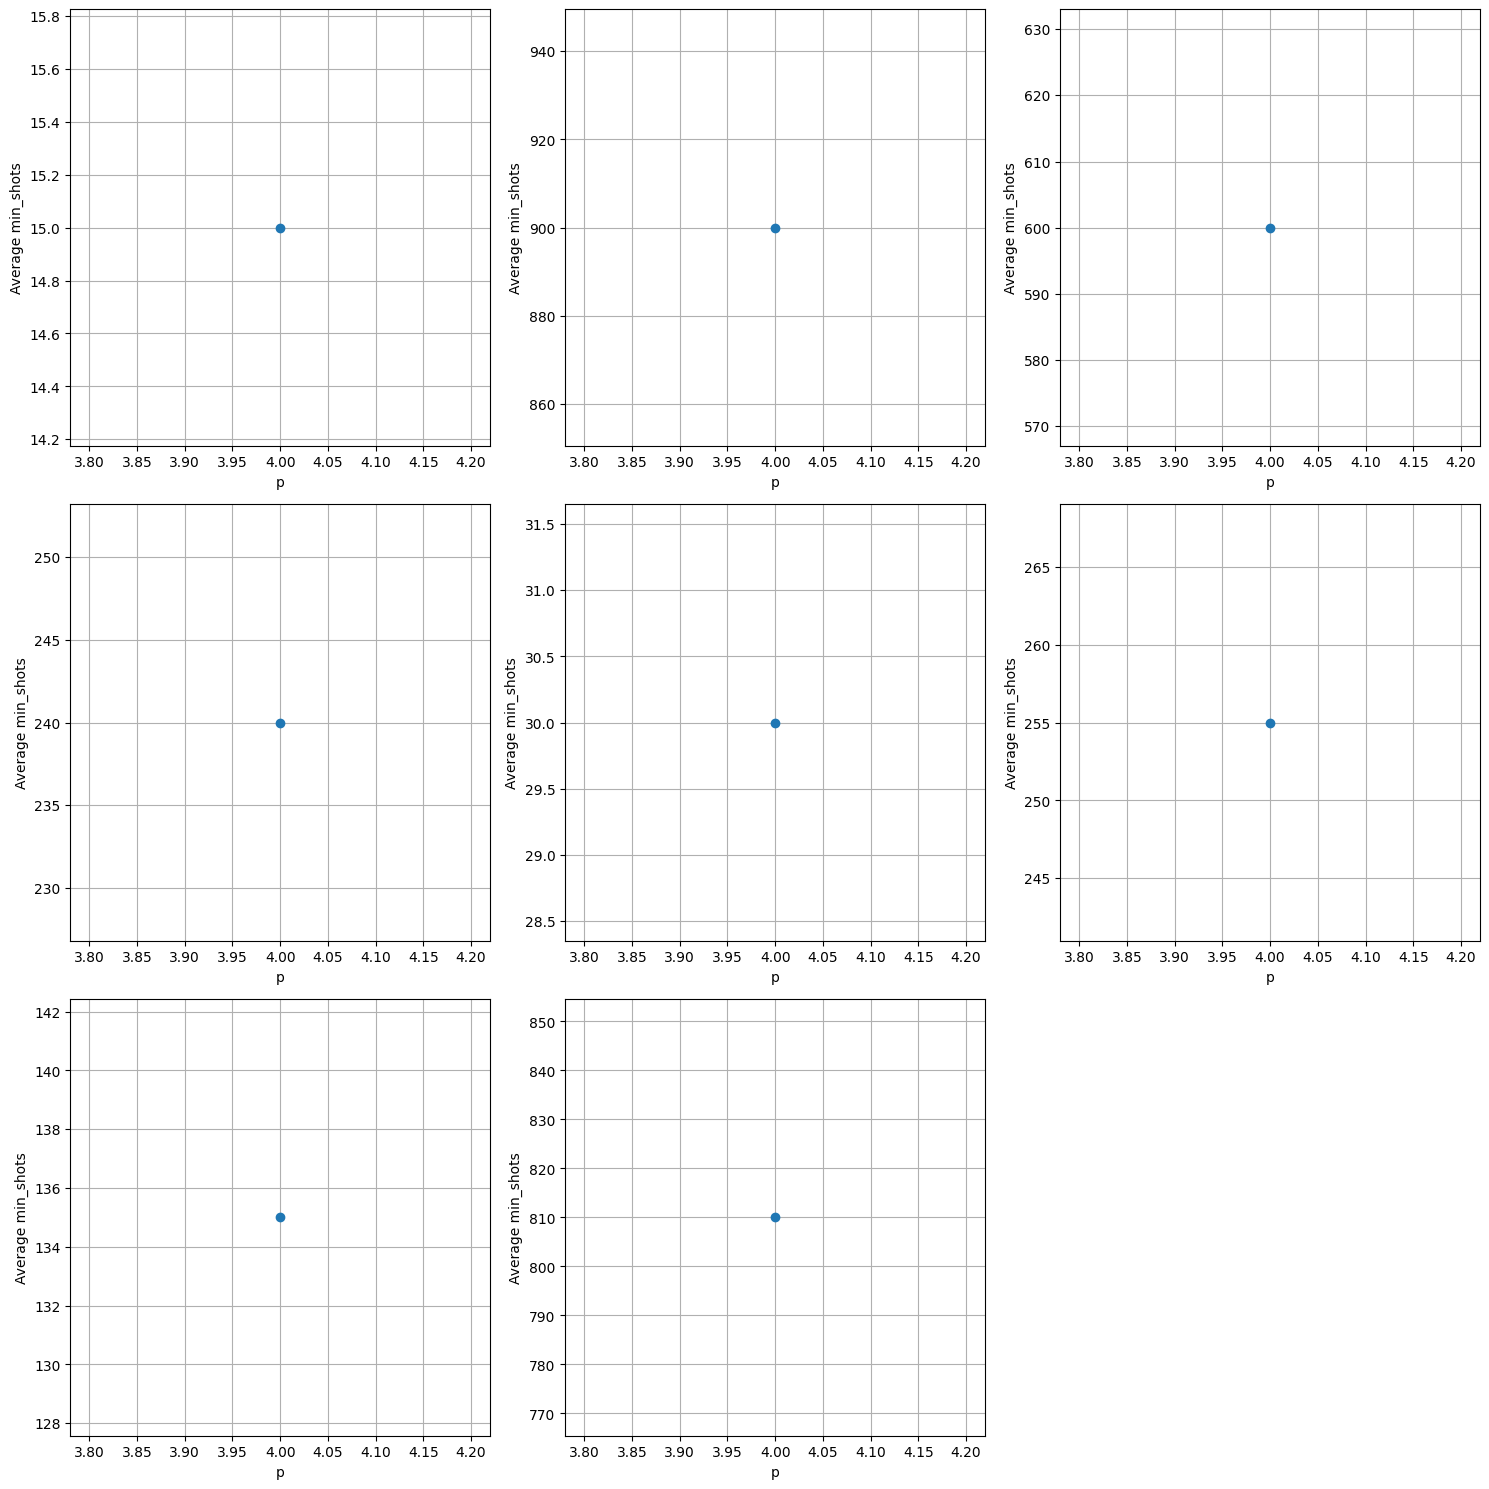

In [18]:
from proteinfolding.data_plotter import DataPlotter

plotter = DataPlotter(df_min_shots)
plotter.plot_p_vs_min_shots_per_structure(save_path=PLOT_DIR)

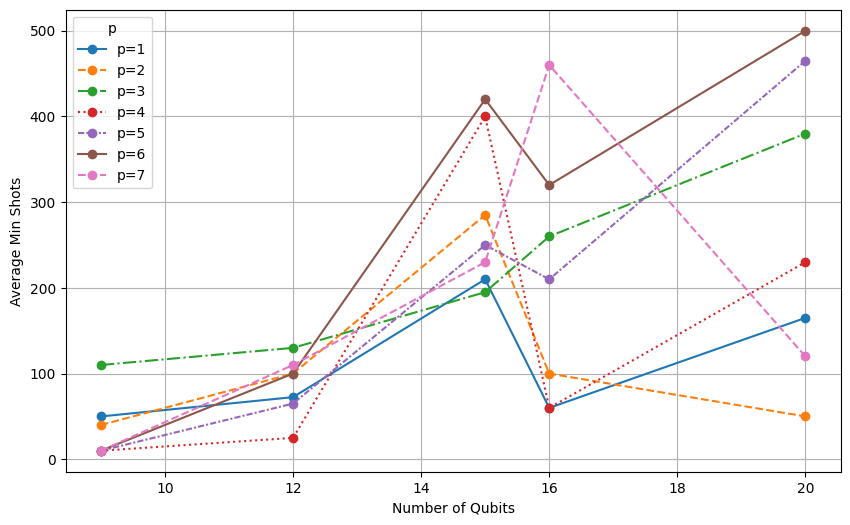

In [52]:
plotter.plot_min_shots_vs_num_qubits_per_p(save_path=PLOT_DIR)


In [ ]:
from proteinfolding.simulations_production import statevector_simulation_XY_parallel_new

num_rot_arr = [3, 4]
num_res_arr = [4, 5]
shots_arr = [15, 20, 25, 30, 35]
alpha_arr = [0.2]
p_arr = [2, 3, 4, 5, 6, 7]

# num_rot_arr = [5, 6]
# num_res_arr = [5, 6]
# shots_arr = [25, 30, 35, 40, 45, 50]
# alpha_arr = [0.2]
# p_arr = [2, 3, 4, 5, 6, 7]

pos = 0

param_list = []

for num_rot in num_rot_arr:
    for num_res in num_res_arr:
        for shots in shots_arr:
            for alpha in alpha_arr:
                for p in p_arr:
                    param_list.append((num_rot, num_res, shots, alpha, p))
                    statevector_simulation_XY_parallel_trained(num_rot=num_rot, num_res=num_res, shots=shots, alpha=alpha, p=p, pos=pos, simulation_id=SIMULATION_ID, ignore_shots=False)

Python script started!
files already present, not generating
Recovered initial point: [0.02210689 1.29606773 0.93691368 0.73465125]
Running main function...
Filtered DataFrame for num_res=4, num_rot=3:
   num_res  num_rot                                           energies  \
5        4        3  [(-1.1096693146973848+0j), (-0.884275304153561...   

                                          bitstrings  
5  ['100100100100', '100100100010', '100100100001...  
Starting QAOA optimization loop...
DEBUG: iteration 1 - intermediate_data[-1] = [{593: 0.066666666666667, 594: 0.133333333333333, 657: 0.066666666666667, 658: 0.066666666666667, 660: 0.066666666666667, 1098: 0.066666666666667, 1105: 0.266666666666667, 1106: 0.133333333333333, 1170: 0.066666666666667, 2194: 0.066666666666667}]
DEBUG: iteration 1 - NO ground state found
DEBUG: iteration 2 - intermediate_data[-1] = [{585: 0.066666666666667, 588: 0.066666666666667, 596: 0.133333333333333, 612: 0.066666666666667, 652: 0.066666666666667, 6

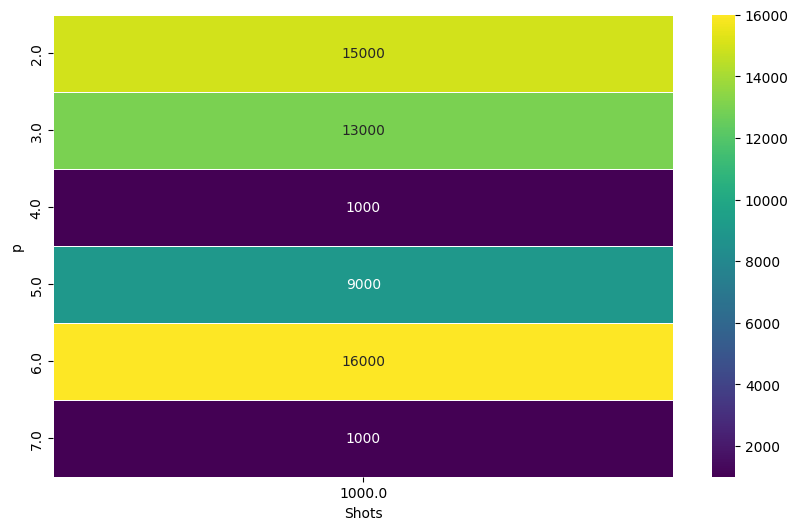

In [36]:
from proteinfolding.data_processing import plot_heatmap

plot_heatmap(df_min_shots)

In [37]:
def find_best_efficiency(df):
    df = df.dropna(subset=['min_shots', 'shots'])

    df['efficiency'] = df['shots'] / df['min_shots']
    
    best_efficiency_per_group = df.groupby(['num_res', 'num_rot']).apply(
        lambda g: g.loc[g['efficiency'].idxmax(), ['p', 'min_iter', 'shots', 'efficiency']]
    ).reset_index()
    
    return best_efficiency_per_group

best_efficiency_results = find_best_efficiency(df_min_shots)
print(best_efficiency_results)

# gives same output as best combinations in this case but a good check

2  num_res  num_rot    p  min_iter   shots  efficiency
0        5        5  4.0       1.0  1000.0         1.0


/var/folders/zr/_ww60qvd18j868qh1qhtky300000gn/T/ipykernel_94364/357333905.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  best_efficiency_per_group = df.groupby(['num_res', 'num_rot']).apply(


In [38]:
print(df_min_shots[df_min_shots['p'] == 2])


   num_res  num_rot  num_qubits  alpha    p  min_iter   shots  min_shots
5        5        5          25    0.2  2.0      15.0  1000.0    15000.0


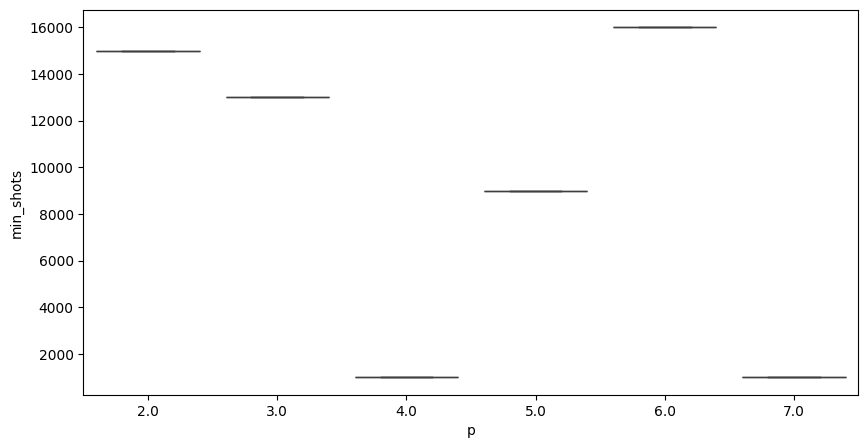

In [39]:
import seaborn as sns

plt.figure(figsize=(10,5))
sns.boxplot(x="p", y="min_shots", data=df_min_shots)
plt.savefig(os.path.join(PLOT_DIR, "distribution_min_shots_per_p.pdf"))
plt.show()
